In [29]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [30]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [31]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [32]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [33]:



df = getQuotes(frameM30, 2023, 9, 1)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1693506600,1.08478,1.08482,1.08364,1.08382,2954,9,0
1,1693508400,1.08382,1.08438,1.08348,1.08362,2262,9,0
2,1693510200,1.08362,1.08420,1.08351,1.08382,1880,9,0
3,1693512000,1.08384,1.08474,1.08362,1.08433,2030,9,0
4,1693513800,1.08432,1.08513,1.08420,1.08485,1494,9,0
...,...,...,...,...,...,...,...,...
619,1695139200,1.06992,1.07009,1.06827,1.06891,4872,9,0
620,1695141000,1.06891,1.06964,1.06868,1.06912,4852,9,0
621,1695142800,1.06913,1.06930,1.06820,1.06856,3612,9,0
622,1695144600,1.06856,1.06925,1.06846,1.06891,3690,9,0


In [34]:



def psar(df = None, af0=0.02, af=0.02, maxaf=0.2, offset=0):
    psar = ta.psar(high=df['high'], low=df['low'], close=df['close'], af0=af0, af=af,max_af=maxaf, offset=0)
    df[f'PSARl_{af}_{maxaf}'] = psar[f'PSARl_{af}_{maxaf}']
    df[f'PSARs_{af}_{maxaf}'] = psar[f'PSARs_{af}_{maxaf}']
    df[f'PSARaf_{af}_{maxaf}'] = psar[f'PSARaf_{af}_{maxaf}']
    df[f'PSARr_{af}_{maxaf}'] = psar[f'PSARr_{af}_{maxaf}']
    return df




In [35]:


af0=0.02
af=0.02
maxaf=0.2
offset=0

df = psar(df, af0, af, maxaf, offset)

df



,time,open,high,low,close,tick_volume,spread,real_volume,PSARl_0.02_0.2,PSARs_0.02_0.2,PSARaf_0.02_0.2,PSARr_0.02_0.2
0,1693506600,1.08478,1.08482,1.08364,1.08382,2954,9,0,NaN,NaN,0.02,0
1,1693508400,1.08382,1.08438,1.08348,1.08362,2262,9,0,1.08348,NaN,0.02,1
2,1693510200,1.08362,1.08420,1.08351,1.08382,1880,9,0,1.08348,NaN,0.02,0
3,1693512000,1.08384,1.08474,1.08362,1.08433,2030,9,0,1.08348,NaN,0.04,0
4,1693513800,1.08432,1.08513,1.08420,1.08485,1494,9,0,1.08351,NaN,0.06,0
...,...,...,...,...,...,...,...,...,...,...,...,...
619,1695139200,1.06992,1.07009,1.06827,1.06891,4872,9,0,NaN,1.071760,0.02,1
620,1695141000,1.06891,1.06964,1.06868,1.06912,4852,9,0,NaN,1.071730,0.02,0
621,1695142800,1.06913,1.06930,1.06820,1.06856,3612,9,0,NaN,1.071661,0.04,0
622,1695144600,1.06856,1.06925,1.06846,1.06891,3690,9,0,NaN,1.071522,0.04,0


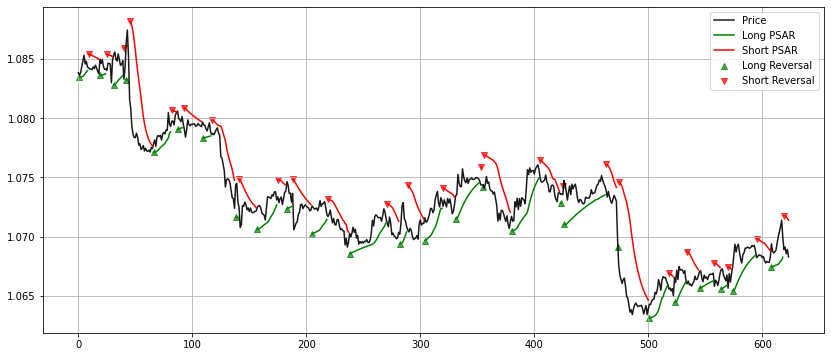

In [36]:




plt.figure(figsize=(14, 6))

plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.plot(df.index, df[f'PSARl_{af}_{maxaf}'], label='Long PSAR', color='green')
plt.plot(df.index, df[f'PSARs_{af}_{maxaf}'], label='Short PSAR', color='red')

# Reversal Signals
reversalPts = df[df[f'PSARr_{af}_{maxaf}'] != 0]
plt.scatter(reversalPts.index, reversalPts[f'PSARl_{af}_{maxaf}'], marker='^', color='green', label='Long Reversal', alpha=0.7)
plt.scatter(reversalPts.index, reversalPts[f'PSARs_{af}_{maxaf}'], marker='v', color='red', label='Short Reversal', alpha=0.7)

plt.legend()
plt.grid(True)
plt.show()



